Теоретический материал – Нейронные сети
Обучение персептрона
Персептрон представляет собой элементарную часть нейронной сети. 
Одиночный персептрон является линейным бинарным классификатором. В 
этой лекции мы рассмотрим процедуру обучения персептрона для 
классификации данных. Поскольку персептрон представляет собой 
бинарный классификатор, то мы будем рассматривать лишь два класса.
Пусть мы рассматриваем некоторое множество (конечное или 
бесконечное) n-мерных векторов, которые будем обозначать 𝑥 =
(𝑥1, 𝑥2, . . . , 𝑥𝑛)
Будем считать, что это множество разбивается на два класса, которые 
мы будем обозначать +1 и -1. Поэтому возникает задача построения 
функции, которая задана на нашем множестве векторов, и принимает 
значения в множестве {+1, −1}. В качестве такой функции может выступать 
персептрон. С алгебраической точки зрения персептрон состоит из вектора 
весов 𝑤 = (𝑤0, 𝑤1, 𝑤2, . . . , 𝑤𝑛).
При этом персептрон работает по формуле
𝑦 = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑥1𝑤1 + 𝑥2𝑤2 + . . . + 𝑥𝑛𝑤𝑛),
где функция 𝑠𝑖𝑔𝑛(𝑡) равна +1, если 𝑡 ≥ 0, и равна −1, если 𝑡 < 0.
Приведем алгоритм обучения персептрона. Пусть у нас есть набор 
обучающих данных {(𝑥, 𝑑)}, где 𝑥 - это различные вектора, а 𝑑 из множества 
{+1, −1} указывает к какому классу относится наш вектор.
1. Положим вектор весов 𝑤 равным нулю.
2. Повторять 𝑁 раз следующие шаги:
3. Для каждого тестового набора (𝑥, 𝑑):
4. Вычислить 𝑦 = 𝑠𝑖𝑔𝑛[(𝑥, 𝑤)].
5. Если 𝑦𝑑 < 0, то скорректировать веса 𝑤0 = 𝑤0 + 𝑎𝑑, 𝑤𝑖 =
𝑤𝑖 + 𝑎𝑑𝑥𝑖
, 𝑖 = 1,2, . . . , 𝑛. 
Описанный алгоритм довольно легко программировать

example: 
1.1.1
Рассмотрим программу обучения персептрона на языке Python. Сначала 
рассмотрим основной класс персептрона, который умеет учиться по 
тестовым данным.


In [1]:
# Binary Classification

# Class that implements the perceptron and its training
class Perceptron:
    def __init__(self, N):
        # Initialize weights to zero
        self.w = [0] * N

    # Method to calculate the value of the perceptron
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res += self.w[i] * x[i]
        return res
    
    # Threshold activation function of the perceptron (Checking the sign)
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
        
    # Training on a single example
    def learn(self, learning_rate, x, y):
        # Train only when the prediction is incorrect
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] += learning_rate * y * x[i]

    # Training on all the data T - list of examples
    def learning(self, learning_rate, T):
        # Training loop
        for _ in range(100):
            # Training on the entire set of examples
            for t in T:
                self.learn(learning_rate, t[0], t[1])

# Create a two-dimensional perceptron class

perceptron = Perceptron(2)
learning_rate = 0.1
# Create examples

T = []
T.append([[2, 1], 1])
T.append([[3, 2], 1])
T.append([[4, 1], 1])
T.append([[1, 2], -1])
T.append([[2, 3], -1])
T.append([[5, 7], -1])
perceptron.learning(learning_rate, T) # Training the perceptron
print(perceptron.w) # Print the weights
# Test the perceptron on some test examples
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

# In this code, we have implemented a simple perceptron for binary classification. The perceptron is trained on a set of two-dimensional examples (T), where each example consists of an input vector and a target class label.

# The Perceptron class has methods to calculate the value of the perceptron (calc), apply the threshold activation function (sign), perform training on a single example (learn), and train on the entire dataset (learning).

# In the learning method, the perceptron is trained by iterating over the dataset multiple times. For each example, if the prediction is incorrect, the weights are adjusted based on the learning rate (learning_rate) and the target class label (y). The weights are updated using the formula: self.w[i] += learning_rate * y * x[i].

# After training, the weights of the perceptron are printed (print(perceptron.w)), and the perceptron is tested on some test examples using the sign method.

# Note: The code assumes that the perceptron is initialized with the number of input features (N). In this case, N is set to 2 because we have two-dimensional input vectors. Adjust the code accordingly if you have a different number of input features.


[0.1, -0.1]
-1
1
1
-1


Теоретический материал – Реализация нейронной сети на Python
Нейронная сеть — это функциональная единица машинного или 
глубокого обучения. Она имитирует поведение человеческого мозга, 
поскольку основана на концепции биологических нейронных сетей.
Наиболее распространенный тип нейронной сети, называемый 
многослойным персептроном (MLP), представляет собой функцию, которая 
отображает входные данные в выходные данные. MLP имеет один входной
слой и один выходной слой. Между ними может быть один или несколько 
скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки. 
Скрытые слои также могут иметь более одного нейрона. Каждый нейрон 
представляет собой линейную функцию, к которой применяется функция 
активации для решения сложных задач. Выход каждого слоя подается в 
качестве входных данных для всех нейронов следующих слоев.
Нейронные сети способны решать множество задач. В основном они 
состоят из таких компонентов:
− входной слой (получение и передача данных);
− скрытый слой (вычисление);
− выходной слой. Чтобы реализовать нейросеть, необходимо 
понимать, как ведут себя нейроны. Нейрон одновременно 
принимает несколько входов, обрабатывает эти данные и выдает 
один выход. Нейронная сеть представляет собой блоки ввода и 
вывода, где каждое соединение имеет соответствующие веса (это 
сила связи нейронов; чем вес больше, тем один нейрон сильнее 
влияет на другой). Данные всех входов умножаются на веса:
− 𝑥 → 𝑥 ∗ 𝑤1;
− 𝑦 → 𝑦 ∗ 𝑤2.
Входы после взвешивания суммируются с прибавлением значения 
порога «c»:
𝑥𝑤1 + 𝑦𝑤2 + 𝑐
Полученное значение пропускается через функцию активации 
(сигмоиду), которая преобразует входы в один выход:
𝑧 = 𝑓(𝑥𝑤1 + 𝑦𝑤2 + 𝑐).
Так выглядит сигмоида:
Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа 
стремятся к нулю, а положительные — к единице.
Например. Пусть нейрон имеет следующие значения: 𝑤 = [0,1] 𝑐 = 4.
Входной слой: 𝑥 = 2, 𝑦 = 3.
((𝑥𝑤1) + (𝑦𝑤2)) + 𝑐 = 20 + 31 + 4 = 7.
𝑧 = 𝑓(7) = 0.99.

1.1.2 Пример

In [2]:
import numpy as np

# Accepts a number as input and transforms it into a value between 0 and 1
# In simpler terms, it normalizes the data
def sigmoid(x):
    # Activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights  # Parameter used for computing the output
        self.bias = bias  # Bias parameter

    # Neuron's feedforward step
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1]) 
bias = 4 #this is the paramter for controling the sensitivity of activation it is is high If the bias is set to a higher value, it shifts the activation threshold to a higher level, making the neuron more likely to fire even for relatively small inputs. Conversely, if the bias is set to a lower value, the neuron becomes less sensitive and requires stronger inputs to reach the activation threshold.
n = Neuron(weights, bias)
x = np.array([2, 3]) 
output = n.feedforward(x)
print("Output Value of the neuron:", output)  # Print the output value of the neuron



# In this code, we have a class Neuron that represents a single neuron. The neuron has weights and a bias, which are initialized in the constructor (__init__ method).

# The sigmoid function is the activation function used by the neuron. It takes a number as input, applies the sigmoid function, and returns a value between 0 and 1.

# The feedforward method of the Neuron class performs the computation step of the neuron. It takes an input vector (inputs), performs the dot product between the weights and the inputs, adds the bias, and then applies the sigmoid function to the result. The output value is returned.

# In the main part of the code, we create an instance of the Neuron class with given weights and bias. We also define an input vector x. The feedforward method is called with x as the input, and the output value of the neuron is printed.
# In the provided code, the output value of approximately 0.9991 indicates a high activation level or a high probability that the input belongs to the positive class. The closer the output is to 1, the more confident the neuron is in classifying the input as positive. Conversely, if the output were closer to 0, it would indicate a higher probability of the input belonging to the negative class.

Output Value of the neuron: 0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов. 
Пример несложной нейронной сети
где:
𝑥1, 𝑥2 — входной слой;
ℎ1, ℎ2 — скрытый слой с двумя нейронами;
𝑜1 — выходной слой.
Например. Представим, что нейроны из графика выше имеют веса 
[0, 1]. Пороговое значение (𝑏) у обоих нейронов равно 0 и они имеют 
идентичную сигмоиду.
При входных данных 𝑥 = [2, 3] получим:
ℎ1 = ℎ2 = 𝑓(𝑤𝑥 + 𝑏) = 𝑓((02) + (1 ∗ 3) + 0) = 𝑓(3) = 0.95.
𝑜1 = 𝑓(𝑤 ∗ [ℎ1, ℎ2] + 𝑏) = 𝑓((0ℎ1) + (1ℎ2) + 0) = 𝑓(0.95) = 0.72.
Входные данные по нейронам передаются до тех пор, пока не 
получатся выходные значения.


In [3]:
import numpy as np

# Neuron class and sigmoid function definition from previous examples

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

# Neural Network class
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

# Create an instance of the neural network
network = OurNeuralNetwork()
x = np.array([2, 3])
output = network.feedforward(x)
print("Input:", x)  # Print the input vector
print("Output:", output)  # Print the output value of the neural network
#it will print the output for the prediction, for example maybe is like, 2 hours studied and 3 hours slept last night, how much is the possibility to pass the exam


Input: [2 3]
Output: 0.7216325609518421


Теоретический материал – Обучение нейронной сети
Обучение нейросети — это подбор весов, которые соответствуют всем 
входам для решения поставленных задач.
Класс нейронной сети:
Каждый этап процесса обучения состоит из:
− прямого распространения (прогнозируемый выход);
− обратного распространения (обновление весов и смещений).
Например:
Дана двуслойная нейросеть:
ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1
) + 𝑏2
).
В данном случае на выход ŷ влияют только две переменные — 𝑤 (веса) и 𝑏
(смещение). Настройку весов и смещений из данных входа или процесс 
обучения нейросети можно изобразить так:
Прямое распространение.
Как видно, формула прямого распространения представляет собой 
несложное вычисление:
ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1) + 𝑏2)
Далее необходимо добавить в код функцию прямого распространения. 
Предположим, что смещения в этом случае будут равны 0

Чтобы вычислить ошибку прогноза, необходимо использовать функцию 
потери. В примере уместно воспользоваться формулой суммы квадратов 
ошибок — средним значением между прогнозируемым и фактическим 
результатами:
𝐸𝑟𝑟𝑜𝑟 = ∑(𝑦 − 𝑦̂)
2
𝑛
𝑖=1
.
Обратное распространение 
Обратное распространение позволяет измерить производные в 
обратном порядке — от конца к началу, и скорректировать веса и смещения. 
Для этого необходимо узнать производную функции потери — тангенс угла 
наклона.
Производная функции по отношению к весам и смещениям позволяет 
узнать градиентный спуск. Производная функции потери не содержит весов 
и смещений, для ее вычисления необходимо добавить правило цепи:
𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂) = ∑(𝑦 − 𝑦̂)
2
𝑛
𝑖=1
𝜕𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂)
𝜕𝑊
=
𝜕𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂)
𝜕𝑦̂
∙
𝜕𝑦̂
𝜕𝑧 ∙
𝜕𝑧
𝜕𝑊 =
= 2(𝑦 − 𝑦̂) ∙ производную сигмоиды ∙ 𝑥 =
= 2(𝑦 − 𝑦̂) ∙ 𝑧(1 − 𝑧) ∙ 𝑥,
где 𝑧 = 𝑊𝑥 + 𝑏.
Благодаря этому правилу можно регулировать веса. Добавляем в код 
Python функцию обратного распространения:
Нейронные сети базируются на определенных алгоритмах и 
математических функциях. Сначала может казаться, что разобраться в них 
довольно сложно. Но существуют готовые библиотеки машинного обучения 
для построения и тренировки нейросетей, позволяющие не углубляться в их 
устройство.


exercise: 

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. 
Данные нейросети:
− три входа (𝑥1, 𝑥2, 𝑥3);
− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
− выход (𝑜1).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [0.5, 0.5, 0.5]
− 𝑏 = 0
Данные нейросети:
− два входа (𝑥1, 𝑥2);
− два нейрона в скрытых слоях (ℎ1, ℎ2);
− два выхода (𝑜1, 𝑜2).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [1, 0];
− 𝑏 = 1

In [4]:
# Neural Network with Three Inputs, Three Hidden Neurons, and One Output

import numpy as np

def sigmoid(x):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        # Calculate the total input to the neuron
        total = np.dot(self.weights, inputs) + self.bias
        # Apply the sigmoid activation function to the total
        return sigmoid(total)

class NeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])  # Weights for the three input features
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        # Feedforward through the neural network
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

# Create an instance of the neural network
network = NeuralNetwork()
x = np.array([0.1, 0.2, 0.3])  # Three input values
output = network.feedforward(x)  # Feedforward the inputs through the network
print("Input:", x)
print("Output:", output)


Input: [0.1 0.2 0.3]
Output: 0.7030081474216077


In [5]:
# Neural Network with Two Inputs, Two Hidden Neurons, and Two Outputs:
import numpy as np

# Hyperbolic tangent activation function

# The hyperbolic tangent (tanh) activation function is commonly used in neural networks as an alternative to
# the sigmoid activation function. It has a range between -1 and 1,
# which allows the activation of neurons to be centered around zero.
def tanh(x):
    return np.tanh(x)

# Neuron class
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

# NeuralNetwork class
class NeuralNetwork:
    def __init__(self):
        weights_h = np.array([1, 0])  # Weights for the two input features in hidden layer
        weights_o = np.array([1, 1])  # Weights for the two inputs from hidden layer to output layer
        bias = 1
        self.h1 = Neuron(weights_h, bias)
        self.h2 = Neuron(weights_h, bias)
        self.o1 = Neuron(weights_o, bias)
        self.o2 = Neuron(weights_o, bias)

    def feedforward(self, x1, x2):
        out_h1 = self.h1.feedforward(np.array([x1, x2]))
        out_h2 = self.h2.feedforward(np.array([x1, x2]))
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

# Create an instance of the neural network
network = NeuralNetwork()
x1 = 0.1
x2 = 0.2
output1, output2 = network.feedforward(x1, x2)  # Feedforward the inputs through the network
print("Input 1:", x1)
print("Input 2:", x2)
print("Output 1:", output1)
print("Output 2:", output2)



Input 1: 0.1
Input 2: 0.2
Output 1: 0.9890491628120831
Output 2: 0.9890491628120831


In [6]:
#  The ReLU function is computationally efficient and easy to implement. It simply returns the input value if it is positive, and zero otherwise.

import numpy as np

# Rectified Linear Unit (ReLU) activation function
def relu(x):
    return np.maximum(0, x)

# Neuron class
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return relu(total)

# NeuralNetwork class
class NeuralNetwork:
    def __init__(self):
        weights_h = np.array([[1, 0], [1, 0]])  # Weights for the two input features in hidden layer
        weights_o = np.array([[1, 1], [1, 1]])  # Weights for the two inputs from hidden layer to output layer
        bias = 1
        self.h1 = Neuron(weights_h[0], bias)
        self.h2 = Neuron(weights_h[1], bias)
        self.o1 = Neuron(weights_o[0], bias)
        self.o2 = Neuron(weights_o[1], bias)

    def feedforward(self, x1, x2):
        out_h1 = self.h1.feedforward(np.array([x1, x2]))
        out_h2 = self.h2.feedforward(np.array([x1, x2]))
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

# Create an instance of the neural network
network = NeuralNetwork()
x1 = 0.1
x2 = -0.2
output1, output2 = network.feedforward(x1, x2)  # Feedforward the inputs through the network
print("Input 1:", x1)
print("Input 2:", x2)
print("Output 1:", output1)
print("Output 2:", output2)


Input 1: 0.1
Input 2: -0.2
Output 1: 3.2
Output 2: 3.2


1.2. Введение в нейронные сети с помощью Scikit-Learn в Python
Теперь мы знаем, что такое нейронные сети и какие шаги необходимо 
выполнить, чтобы построить простую нейронную сеть с плотными связями. 
В этом разделе мы попытаемся построить простую нейронную сеть, которая 
предсказывает класс, к которому принадлежит данное растение ириса. Мы 
будем использовать библиотеку Python Scikit-Learn для создания нашей 
нейронной сети.
Sklearn предоставляет 2 оценщика для задач классификации и 
регрессии соответственно:
− MLPClassifier;
− MLPRegressor 
Начнем с импорта необходимых библиотек.
MLPClassifier
Загрузка данных
Мы будем загружать два набора данных.
Набор данных цифр: мы будем использовать набор данных цифр, 
который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем 
использовать цифровые данные для задач классификации.
Набор данных о жилье в Бостоне: мы будем использовать набор 
данных о жилье в Бостоне, который содержит информацию о различных 
свойствах дома, таких как среднее количество комнат, уровень преступности 
на душу населения в городе и т. д. Мы будем использовать его для задач 
регрессии.
Sklearn предоставляет оба этих набора данных. Мы можем загрузить 
их, вызвав методы load_digits() и load_boston().
Классификация
MLPClassifier — это клвсс, доступный как часть модуля neuro_network 
sklearn для выполнения задач классификации с использованием 
многослойного персептрона.
Как обычно разделим набор данных на две части:
− данные обучения, которые будут использоваться для модели 
обучения;
− тестовые данные, по которым будет проверяться точность 
обученной модели.
Функция train_test_split модуля model_selection sklearn поможет нам 
разделить данные на два набора: 80% для обучения и 20% для тестирования. 
Мы также используем seed(random_state=123) с train_test_split, чтобы мы 
всегда получали одно и то же разделение и могли сравнивать и 
воспроизволить результаты в будущем.
Для начала натренируем модель MLPClassifier с параметрами по умолчанию 
для тренировочных данных.
Cоздадим метод plot_confusion_matrix(), который принимает исходные и 
предсказанные метки данных по модели. Затем он строит матрицу путаницы, 
используя matplotlib
MLPRegressor — это класс, доступный как часть библиотеки 
neuro_network sklearn для выполнения задач регрессии с использованием 
многослойного персептрона. Также разделим набор данных на две части:
− данные обучения (80%), которые будут использоваться для 
модели обучения;
− тестовые данные (20%), по которым будет проверяться точность 
обученной модели

example: 
Используйте классы MLPClassified и MLPRegressor для классификации и 
регрессии произвольных данных из интернета. Проведите анализ 
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f
7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)
df.head(5)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
df = df.rename(columns={'variety': 'target'})
X_df, Y_df = df.drop(['target'], axis=1), df.target
print('Dataset Size: ', X_df.shape, Y_df.shape)

Dataset Size:  (150, 4) (150,)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, train_size=0.80, test_size=0.20, stratify=Y_df,
                                                    random_state=123)
print('Train/Test Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (120, 4) (30, 4) (120,) (30,)


In [19]:
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier with specified parameters
mlp_classifier = MLPClassifier(random_state=123, max_iter=1000) #the seed to gain the same result everytime it runs 

# Train the classifier using the training data
mlp_classifier.fit(X_train, Y_train)


MLPClassifier(max_iter=1000, random_state=123)

[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
Loss: 0.06237838693566958
Number of Coefs: 2
Number of Intercepts: 2
Number of Iterations for which Estimator Ran: 641
Name of Output Layer Activation Function: softmax


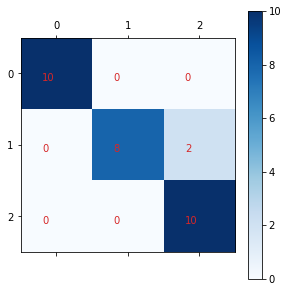

In [11]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(Y_test, Y_preds):
    # Compute confusion matrix
    conf_mat = confusion_matrix(Y_test, Y_preds)
    print(conf_mat)

    # Plot confusion matrix
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar()

    # Add text annotations to the plot
    for i in range(3):
        for j in range(3):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j, i]), color='tab:red')

# Call the function to plot confusion matrix
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

# Print additional information
print('Loss:', mlp_classifier.loss_)
print('Number of Coefs:', len(mlp_classifier.coefs_))
print('Number of Intercepts:', len(mlp_classifier.intercepts_))
print('Number of Iterations for which Estimator Ran:', mlp_classifier.n_iter_)
print('Name of Output Layer Activation Function:', mlp_classifier.out_activation_)


# The confusion matrix is a tabular representation that summarizes the performance of a classification model on a dataset. 
# It provides a detailed breakdown of the model's predictions and the actual labels of the data.
# The confusion matrix has a square shape, where the rows represent the actual or true labels 
# of the data, and the columns represent the predicted labels by the model. Each cell in the matrix represents the
# count or frequency of samples falling into a particular combination of true and predicted labels.
# The confusion matrix allows you to derive several important evaluation metrics for assessing the model's performance, including:

# True Positives (TP): The number of samples that are correctly predicted as positive for a specific class.
# True Negatives (TN): The number of samples that are correctly predicted as negative for a specific class.
# False Positives (FP): The number of samples that are incorrectly predicted as positive (Type I error) for a specific class.
# False Negatives (FN): The number of samples that are incorrectly predicted as negative (Type II error) for a specific class.
# From the confusion matrix, you can calculate various performance metrics, such as:

# Accuracy: Overall correctness of the model's predictions (sum of diagonal cells divided by the total number of samples).
# Precision: The ability of the model to correctly identify positive predictions (TP / (TP + FP)).
# Recall (Sensitivity or True Positive Rate): The proportion of actual positive samples that are correctly identified by the model (TP / (TP + FN)).
# Specificity (True Negative Rate): The proportion of actual negative samples that are correctly identified by the model (TN / (TN + FP)).
# F1-score: The harmonic mean of precision and recall, providing a balanced measure between the two metrics.
# Analyzing the confusion matrix helps you understand the model's performance in terms of correctly and incorrectly classified samples for each class. It allows you to identify common sources of misclassification, such as false positives and false negatives, which can guide you in improving the model or making decisions based on its predictions.


# Loss: The loss value (0.06884106415956573) represents the objective or cost function of the MLPClassifier. It indicates the measure of inconsistency between the predicted class probabilities and the true labels. Lower values indicate better model performance.
# Number of Coefs: The number of coefs (2) refers to the number of coefficients or weights in the model. In this case, it indicates the total number of weights associated with the connections between the input and hidden layers, and between the hidden and output layers.
# Number of Intercepts: The number of intercepts (2) represents the number of bias terms in the model. Bias terms are additional parameters added to each neuron, allowing the model to learn offsets or shifts in the decision boundaries
# Number of Iterations for which Estimator Ran: The number of iterations (630) signifies the total number of training iterations or epochs the MLPClassifier performed during the training process. Each iteration involves presenting the training data to the model and adjusting the weights to minimize the loss.
# Name of Output Layer Activation Function: The output layer activation function (softmax) indicates the type of activation function used in the output layer of the MLPClassifier. Softmax is commonly used for multi-class classification problems as it produces probabilities for each class, ensuring that the predicted class probabilities sum up to 1.
# These values provide insights into the properties and behavior of the trained MLPClassifier model, such as its performance (loss), complexity (number of coefs and intercepts), convergence (number of iterations), and the activation function used in the output layer.
# These values indicate the number of instances that were correctly classified for each respective class. In other words, they represent the count of true positives for each class.

Регрессор

In [12]:
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df = pd.read_csv(url)
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, train_size = 0.80, test_size = 0.20, random_state = 123)
print ('Train/Test size: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test size:  (120, 4) (30, 4) (120,) (30,)


In [18]:

# # from sklearn.neural_network import MLPRegressor

# # Create an instance of MLPRegressor
# mlp_regressor = MLPRegressor(random_state=123, max_iter=35000)

# # # Fit the model to the training data
# mlp_regressor.fit(X_train, Y_train)


# # Classifier: A classifier is used for solving classification problems, where the task is to predict the class or category of a given input. The output of a classifier is a discrete label or class. For example, classifying an email as "spam" or "not spam" or categorizing images into different classes such as "cat," "dog," or "bird."

# # Regressor: A regressor is used for solving regression problems, where the task is to predict a continuous numerical value or quantity. The output of a regressor is a continuous value. For example, predicting the price of a house based on its features, estimating the temperature based on historical data, or forecasting stock prices.

# # In terms of algorithms and techniques, classifiers and regressors often utilize similar machine learning models, such as neural networks, decision trees, support vector machines, etc. However, their training and evaluation processes may differ, as well as the evaluation metrics used to assess their performance.

# # In scikit-learn, the MLPClassifier class is specifically designed for classification tasks, while the MLPRegressor class is designed for regression tasks. They have different default activation functions for the output layer (softmax for MLPClassifier and identity for MLPRegressor), and their loss functions and evaluation metrics are tailored accordingly. However, you can still customize the architecture and other parameters to fit your specific problem within the respective framework.

In [44]:
# Y_preds = mlp_regressor.predict(X_test)

# print (Y_preds[:10])
# print (Y_test[:10])
# print ('Test R^2 Score: %.3f'%mlp_regressor.score(X_test, Y_test))
# print ('Training R^2 Score: %.3f'%mlp_regressor.score(X_train, Y_train))

# print ('Loss: ', mlp_regressor.loss_)
# print ('Number of Coefs: ', len(mlp_regressor.coefs_))
# print ('Number of Intercepts: ', len(mlp_regressor.intercepts_))
# print ('Number of Iteration for Which Estimator Ran: ', mlp_regressor.n_iter_)
# print ('Name of Output Layer Activation Function: ', mlp_regressor.out_activation_)